# Image Basics: I/O and Visualization

---

**Welcome to Image Processing!**

This notebook introduces the fundamentals of working with images in Python. We'll cover everything from basic concepts to practical examples using popular libraries like OpenCV, PIL (Pillow), and imageio.

By the end of this notebook, you'll understand:
- What images are and how they're represented digitally
- Different image formats and when to use them
- Color spaces and why they matter
- How to read, write, and display images using Python libraries
- Best practices for image processing workflows

**Prerequisites:** Basic Python knowledge (variables, functions, importing modules)

**Libraries Used:**
- `opencv-python` (cv2) - Industry standard for computer vision
- `Pillow` (PIL) - Python Imaging Library, great for basic operations
- `imageio` - Simple interface for reading/writing images
- `matplotlib` - For visualization and plotting
- `numpy` - For array operations (used internally by the above libraries)

**Installation:**
```bash
pip install opencv-python pillow imageio matplotlib numpy
```

Let's get started!

# Table of Contents

1. [What is an Image? Understanding Digital Images](#1-what-is-an-image-understanding-digital-images)
2. [Image Formats: Which One to Use?](#2-image-formats-which-one-to-use)
3. [Color Spaces: How Colors Are Represented](#3-color-spaces-how-colors-are-represented)
4. [Reading Images with OpenCV](#4-reading-images-with-opencv)
5. [Reading Images with PIL (Pillow)](#5-reading-images-with-pil-pillow)
6. [Reading Images with imageio](#6-reading-images-with-imageio)
7. [Writing/Saving Images](#7-writing-saving-images)
8. [Visualization with matplotlib](#8-visualization-with-matplotlib)
9. [Advanced Examples: Combining Operations](#9-advanced-examples-combining-operations)
10. [Conclusion](#10-conclusion)


## 1. What is an Image? Understanding Digital Images

Before we dive into code, let's understand what images are in the digital world.

### Pixels: The Building Blocks
An image is essentially a grid of tiny colored dots called **pixels** (picture elements). Each pixel contains color information.

Think of an image like a spreadsheet:
- **Rows and Columns**: Width and height in pixels (resolution)
- **Cells**: Each cell contains color values
- **Channels**: Different aspects of color (red, green, blue, etc.)

### Key Concepts:
- **Resolution**: Width × Height (e.g., 1920×1080 pixels)
- **Channels**: Number of color components per pixel
  - Grayscale: 1 channel (black to white)
  - Color: 3 channels (RGB) or 4 channels (RGBA includes transparency)
- **Bit Depth**: How many colors can be represented (8-bit = 256 levels per channel)

### Why Python for Image Processing?
- **Easy to Learn**: Simple syntax for beginners
- **Powerful Libraries**: OpenCV, PIL, scikit-image, etc.
- **Integration**: Works well with NumPy, pandas, and ML frameworks
- **Open Source**: Free and actively maintained

In Python, images are typically represented as NumPy arrays where:
- Shape for grayscale: (height, width)
- Shape for color: (height, width, channels)

In [1]:
# Let's start by importing the libraries we'll need
import cv2  # OpenCV for computer vision
import numpy as np  # NumPy for array operations
from PIL import Image  # Pillow (PIL) for image processing
import imageio  # Simple image I/O
import matplotlib.pyplot as plt  # For visualization
import os  # For file operations

# Set up matplotlib for inline display in Jupyter
%matplotlib inline

# Configure matplotlib for better image display
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("Libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"Pillow version: {Image.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
OpenCV version: 4.12.0
Pillow version: 11.3.0
NumPy version: 2.2.6


## 2. Image Formats: Which One to Use?

Different image formats serve different purposes. Here's a quick guide:

### Common Formats:
- **JPEG (JPG)**: 
  - Lossy compression (smaller file size)
  - Good for photos, not great for graphics with sharp edges
  - No transparency support
  - Best for: Photographs, web images

- **PNG**:
  - Lossless compression (larger files)
  - Supports transparency (alpha channel)
  - Perfect for graphics, logos, images with text
  - Best for: Web graphics, screenshots, images needing transparency

- **BMP**:
  - Uncompressed (very large files)
  - No quality loss
  - Best for: Temporary storage, when quality matters most

- **TIFF**:
  - Lossless compression option
  - Supports multiple pages, high bit depths
  - Best for: Professional photography, printing, medical imaging

### Choosing the Right Format:
- **Web/Social Media**: JPEG for photos, PNG for graphics
- **Archival/Professional**: TIFF or PNG
- **Temporary Work**: BMP (quality preservation during processing)

## 3. Color Spaces: How Colors Are Represented

Color spaces define how we represent and manipulate colors. Different spaces are useful for different tasks.

### RGB (Red, Green, Blue)
- **How it works**: Additive color mixing
- **Range**: 0-255 per channel (8-bit)
- **Use case**: Standard for digital displays, web, photos
- **Shape**: (height, width, 3) where 3 = [R, G, B]

### BGR (Blue, Green, Red)
- **Same as RGB but channels swapped**
- **OpenCV default**: cv2.imread() returns BGR images
- **Why?**: Historical reasons (OpenCV was designed for BGR)

### HSV (Hue, Saturation, Value)
- **Hue**: Color type (0-179 in OpenCV)
- **Saturation**: Color intensity/purity (0-255)
- **Value**: Brightness (0-255)
- **Use case**: Color-based segmentation, when you care about color types rather than exact RGB values

### Grayscale
- **Single channel**: 0-255 (black to white)
- **Use case**: When color doesn't matter, reduces computational complexity
- **Shape**: (height, width)

### Why Conversions Matter:
- **Display**: matplotlib expects RGB, OpenCV gives BGR
- **Processing**: HSV useful for color thresholding
- **Storage**: Grayscale saves space when color isn't needed

In [2]:
# Let's demonstrate color spaces with a sample image
# First, check what sample images are available
sample_dir = 'datasets/sample_images/'
available_images = os.listdir(sample_dir)
print("Available sample images:")
for img in available_images:
    print(f"  - {img}")

# Use sample1.png for our examples
image_path = os.path.join(sample_dir, 'sample1.png')
print(f"\nUsing: {image_path}")
print(f"File exists: {os.path.exists(image_path)}")

Available sample images:
  - box1.png
  - coins.png
  - doc_photo.png
  - group.jpg
  - noisy_sp.png
  - road.png
  - sample1.png
  - sample2.png

Using: datasets/sample_images/sample1.png
File exists: True


## 4. Reading Images with OpenCV

OpenCV is the most popular computer vision library. It's fast, powerful, and handles many formats.

### Key Functions:
- `cv2.imread()` - Read image from file
- `cv2.cvtColor()` - Convert between color spaces
- `cv2.imwrite()` - Write image to file

### Important Notes:
- OpenCV reads images in BGR format by default (not RGB!)
- Returns None if file doesn't exist or can't be read
- Supports: JPEG, PNG, BMP, TIFF, and more

In [3]:
# Example 1: Basic image reading with OpenCV
print("=== Reading with OpenCV ===")

# Read the image
img_bgr = cv2.imread(image_path)  # Returns BGR format by default

# Check if image was loaded successfully
if img_bgr is None:
    print(f"Error: Could not load image from {image_path}")
    print("Please check the file path and ensure the image exists.")
else:
    # Get image properties
    height, width, channels = img_bgr.shape
    dtype = img_bgr.dtype
    
    print(f"Image loaded successfully!")
    print(f"Shape: {img_bgr.shape} (height: {height}, width: {width}, channels: {channels})")
    print(f"Data type: {dtype}")
    print(f"Size in memory: {img_bgr.nbytes} bytes")
    
    # Convert BGR to RGB for proper display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(f"Converted to RGB: {img_rgb.shape}")
    
    # Let's also show grayscale conversion
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    print(f"Converted to Grayscale: {img_gray.shape}")

=== Reading with OpenCV ===
Image loaded successfully!
Shape: (384, 512, 3) (height: 384, width: 512, channels: 3)
Data type: uint8
Size in memory: 589824 bytes
Converted to RGB: (384, 512, 3)
Converted to Grayscale: (384, 512)


In [4]:
# Example 2: Reading different formats and error handling
print("=== Reading Different Formats ===")

# List of sample images to try
test_images = ['sample1.png', 'coins.png', 'group.jpg']

for img_name in test_images:
    img_path = os.path.join(sample_dir, img_name)
    
    # Try to read the image
    img = cv2.imread(img_path)
    
    if img is not None:
        h, w, c = img.shape
        file_size = os.path.getsize(img_path)
        print(f"✓ {img_name}: {w}x{h} pixels, {c} channels, {file_size} bytes")
    else:
        print(f"✗ {img_name}: Failed to load")
        
# Demonstrate error handling for non-existent file
non_existent = cv2.imread('datasets/sample_images/non_existent.jpg')
if non_existent is None:
    print("\nAs expected, non-existent file returned None")

=== Reading Different Formats ===
✓ sample1.png: 512x384 pixels, 3 channels, 5296 bytes
✓ coins.png: 512x384 pixels, 3 channels, 3669 bytes
✓ group.jpg: 512x384 pixels, 3 channels, 6161 bytes

As expected, non-existent file returned None


## 5. Reading Images with PIL (Pillow)

PIL (Pillow) is Python's go-to library for basic image operations. It's simpler than OpenCV for basic tasks.

### Key Features:
- Reads images in RGB format (no BGR confusion)
- Great for format conversions
- Easy to use API
- Good for basic manipulations (resize, rotate, etc.)

### When to Use PIL:
- Simple image loading/display
- Format conversions
- Basic image manipulations
- Working with existing PIL-based code

In [5]:
# Example: Reading with PIL
print("=== Reading with PIL ===")

# Open image with PIL
pil_image = Image.open(image_path)

# Get image info
print(f"Format: {pil_image.format}")
print(f"Size: {pil_image.size} (width x height)")
print(f"Mode: {pil_image.mode}")  # RGB, RGBA, L (grayscale), etc.

# Convert to NumPy array for manipulation
pil_array = np.array(pil_image)
print(f"As NumPy array: {pil_array.shape}, dtype: {pil_array.dtype}")

# PIL modes explanation
print("\nPIL Mode meanings:")
print("- 'RGB': 3 channels, standard color")
print("- 'RGBA': 4 channels, includes transparency")
print("- 'L': 1 channel, grayscale")
print("- 'P': Palette mode, uses color palette")

# Convert to different modes
gray_pil = pil_image.convert('L')
print(f"\nConverted to grayscale: mode={gray_pil.mode}, size={gray_pil.size}")

=== Reading with PIL ===
Format: PNG
Size: (512, 384) (width x height)
Mode: RGB
As NumPy array: (384, 512, 3), dtype: uint8

PIL Mode meanings:
- 'RGB': 3 channels, standard color
- 'RGBA': 4 channels, includes transparency
- 'L': 1 channel, grayscale
- 'P': Palette mode, uses color palette

Converted to grayscale: mode=L, size=(512, 384)


In [6]:
# Example: PIL format detection and conversion
print("=== PIL Format Handling ===")

test_files = ['sample1.png', 'group.jpg', 'coins.png']

for filename in test_files:
    filepath = os.path.join(sample_dir, filename)
    
    try:
        with Image.open(filepath) as img:
            print(f"{filename}:")
            print(f"  Original format: {img.format}")
            print(f"  Size: {img.size}")
            print(f"  Mode: {img.mode}")
            
            # Save in different format (temporarily)
            temp_path = f"temp_converted_{filename.split('.')[0]}.jpg"
            img.save(temp_path, 'JPEG', quality=90)
            print(f"  Saved as JPEG: {temp_path}")
            
            # Clean up
            if os.path.exists(temp_path):
                os.remove(temp_path)
                print(f"  Cleaned up: {temp_path}")
            
    except Exception as e:
        print(f"Error with {filename}: {e}")
    
    print()

=== PIL Format Handling ===
sample1.png:
  Original format: PNG
  Size: (512, 384)
  Mode: RGB
  Saved as JPEG: temp_converted_sample1.jpg
  Cleaned up: temp_converted_sample1.jpg

group.jpg:
  Original format: JPEG
  Size: (512, 384)
  Mode: RGB
  Saved as JPEG: temp_converted_group.jpg
  Cleaned up: temp_converted_group.jpg

coins.png:
  Original format: PNG
  Size: (512, 384)
  Mode: RGB
  Saved as JPEG: temp_converted_coins.jpg
  Cleaned up: temp_converted_coins.jpg



## 6. Reading Images with imageio

imageio provides a very simple interface for reading and writing images. It's great for beginners.

### Key Features:
- Simple one-line reading/writing
- Returns NumPy arrays directly
- Supports many formats automatically
- Minimal code for basic operations

### When to Use imageio:
- Quick prototyping
- When you need simplicity
- Working with animated formats (GIFs)
- Reading scientific image formats

In [7]:
# Example: Reading with imageio
print("=== Reading with imageio ===")

# Read image - super simple!
img_io = imageio.imread(image_path)

print(f"Image shape: {img_io.shape}")
print(f"Data type: {img_io.dtype}")
print(f"Min/Max values: {img_io.min()} / {img_io.max()}")

# imageio automatically handles different formats
print("\nTrying different formats:")
formats_to_test = ['sample1.png', 'group.jpg']

for fmt in formats_to_test:
    try:
        img_test = imageio.imread(os.path.join(sample_dir, fmt))
        print(f"✓ {fmt}: {img_test.shape}, dtype={img_test.dtype}")
    except Exception as e:
        print(f"✗ {fmt}: {e}")

=== Reading with imageio ===
Image shape: (384, 512, 3)
Data type: uint8
Min/Max values: 10 / 255

Trying different formats:
✓ sample1.png: (384, 512, 3), dtype=uint8
✓ group.jpg: (384, 512, 3), dtype=uint8


C:\Users\DELL\AppData\Local\Temp\ipykernel_20684\3310619870.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_io = imageio.imread(image_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20684\3310619870.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_test = imageio.imread(os.path.join(sample_dir, fmt))


## 7. Writing/Saving Images

Saving images is just as important as reading them. Different libraries have different approaches.

### Quality Considerations:
- **JPEG**: Quality parameter (0-100, higher = better quality but larger file)
- **PNG**: Compression level (0-9, higher = smaller file but slower)
- **File Formats**: Choose based on your needs (web, print, archival)

In [8]:
# Example: Saving images with different libraries
print("=== Saving Images ===")

# Read original image
original = cv2.imread(image_path)
if original is None:
    print("Could not load image")
else:
    # Create output directory if it doesn't exist
    output_dir = 'output_images'
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. Save with OpenCV (different formats)
    cv2.imwrite(os.path.join(output_dir, 'saved_opencv.png'), original)
    cv2.imwrite(os.path.join(output_dir, 'saved_opencv.jpg'), original, [cv2.IMWRITE_JPEG_QUALITY, 90])
    cv2.imwrite(os.path.join(output_dir, 'saved_opencv.bmp'), original)
    
    # 2. Save with PIL
    pil_img = Image.fromarray(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    pil_img.save(os.path.join(output_dir, 'saved_pil.png'))
    pil_img.save(os.path.join(output_dir, 'saved_pil.jpg'), 'JPEG', quality=95)
    
    # 3. Save with imageio
    rgb_img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    imageio.imwrite(os.path.join(output_dir, 'saved_imageio.png'), rgb_img)
    imageio.imwrite(os.path.join(output_dir, 'saved_imageio.jpg'), rgb_img)
    
    print("Images saved in different formats!")
    
    # Compare file sizes
    print("\nFile size comparison:")
    saved_files = [
        'saved_opencv.png', 'saved_opencv.jpg', 'saved_opencv.bmp',
        'saved_pil.png', 'saved_pil.jpg',
        'saved_imageio.png', 'saved_imageio.jpg'
    ]
    
    for filename in saved_files:
        filepath = os.path.join(output_dir, filename)
        if os.path.exists(filepath):
            size = os.path.getsize(filepath)
            print(f"{filename}: {size} bytes")

=== Saving Images ===
Images saved in different formats!

File size comparison:
saved_opencv.png: 9617 bytes
saved_opencv.jpg: 8455 bytes
saved_opencv.bmp: 589878 bytes
saved_pil.png: 5197 bytes
saved_pil.jpg: 10075 bytes
saved_imageio.png: 5197 bytes
saved_imageio.jpg: 6800 bytes


## 8. Visualization with matplotlib

matplotlib is Python's plotting library and works great for displaying images.

### Key Functions:
- `plt.imshow()` - Display image
- `plt.subplot()` - Multiple images in one figure
- `plt.axis('off')` - Hide axes for cleaner display

### Important Notes:
- matplotlib expects RGB images (not BGR)
- Grayscale images work directly
- Use `cmap='gray'` for grayscale display of single-channel images

=== Basic Image Visualization ===


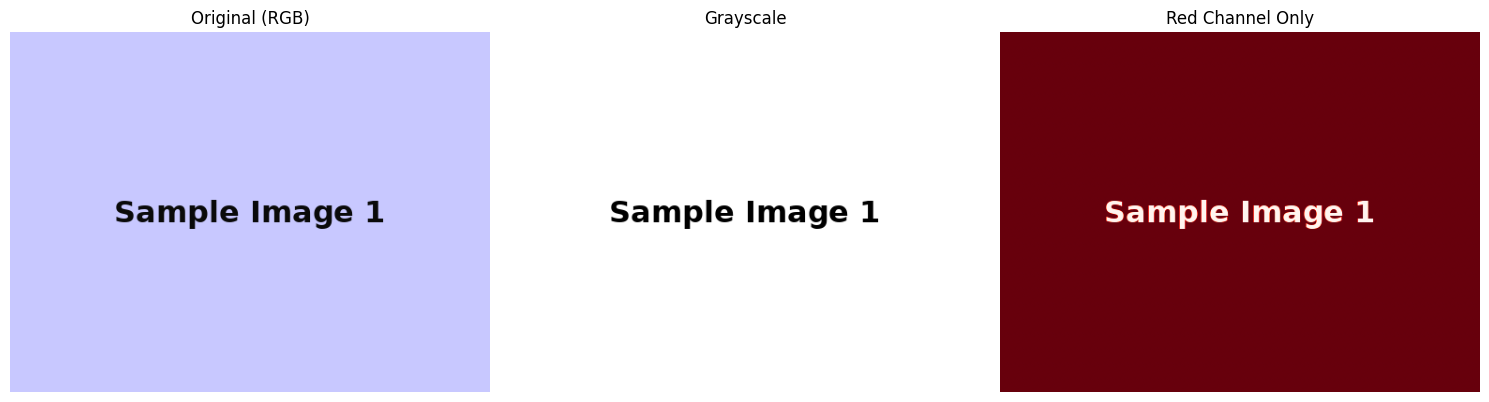

RGB image shape: (384, 512, 3)
Grayscale shape: (384, 512)
Red channel shape: (384, 512)


In [9]:
# Example: Basic visualization
print("=== Basic Image Visualization ===")

# Read image
img = cv2.imread(image_path)
if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original (RGB)
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original (RGB)')
    axes[0].axis('off')
    
    # Grayscale
    axes[1].imshow(img_gray, cmap='gray')
    axes[1].set_title('Grayscale')
    axes[1].axis('off')
    
    # Individual channels
    axes[2].imshow(img_rgb[:, :, 0], cmap='Reds')  # Red channel
    axes[2].set_title('Red Channel Only')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print channel info
    print(f"RGB image shape: {img_rgb.shape}")
    print(f"Grayscale shape: {img_gray.shape}")
    print(f"Red channel shape: {img_rgb[:, :, 0].shape}")
else:
    print("Could not load image")

=== Comparing Multiple Images ===


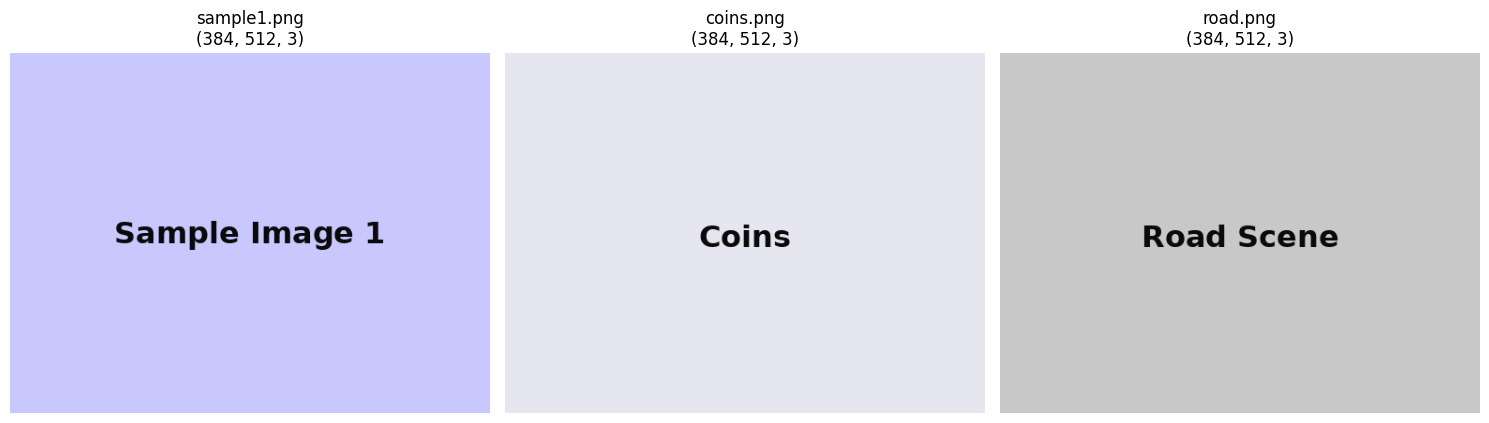

In [10]:
# Example: Multiple images comparison
print("=== Comparing Multiple Images ===")

# Load several sample images
sample_files = ['sample1.png', 'coins.png', 'road.png']
images = []
titles = []

for filename in sample_files:
    img_path = os.path.join(sample_dir, filename)
    img = cv2.imread(img_path)
    if img is not None:
        images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        titles.append(filename)

if images:
    # Create subplots
    n_images = len(images)
    fig, axes = plt.subplots(1, n_images, figsize=(5*n_images, 5))
    
    # Handle single image case
    if n_images == 1:
        axes = [axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(f'{title}\n{img.shape}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No images could be loaded")

## 9. Advanced Examples: Combining Operations

Let's put it all together with some practical examples that combine reading, processing, and visualization.

=== Complete Image Processing Pipeline ===


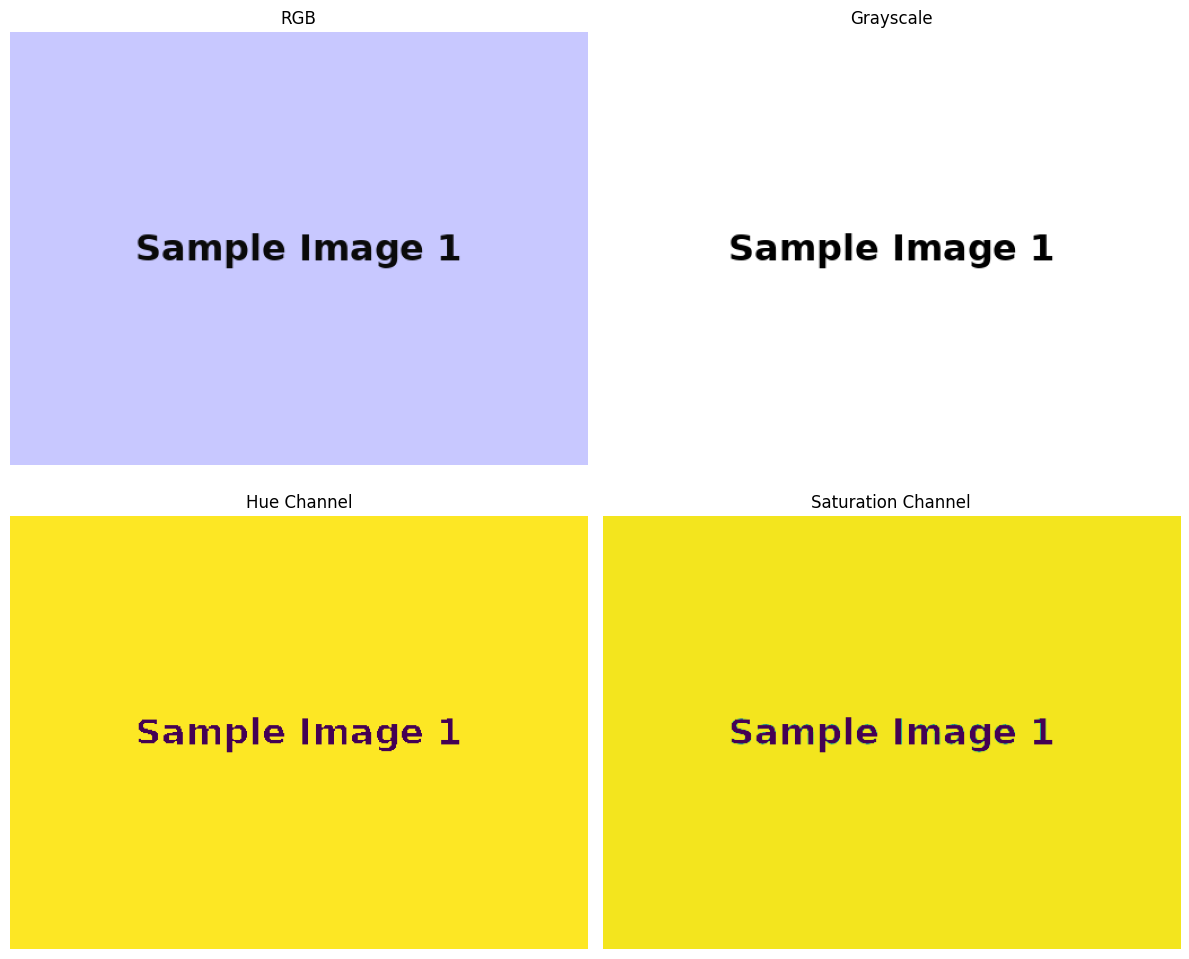


Image Statistics:
Shape: (384, 512, 3)
Data type: uint8
RGB Means: R=197.2, G=197.2, B=251.4
RGB Std Devs: R=22.1, G=22.1, B=28.5
Grayscale: Mean=203.1, Std=22.8


In [11]:
# Example: Image analysis pipeline
print("=== Complete Image Processing Pipeline ===")

def analyze_image(image_path):
    """Complete image analysis function"""
    
    # 1. Read with OpenCV
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        return None, "Could not load image"
    
    # 2. Convert to different color spaces
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # 3. Get statistics
    stats = {
        'shape': img_rgb.shape,
        'dtype': str(img_rgb.dtype),
        'rgb_mean': [img_rgb[:, :, i].mean() for i in range(3)],
        'rgb_std': [img_rgb[:, :, i].std() for i in range(3)],
        'gray_mean': img_gray.mean(),
        'gray_std': img_gray.std()
    }
    
    return {
        'bgr': img_bgr,
        'rgb': img_rgb,
        'hsv': img_hsv,
        'gray': img_gray,
        'stats': stats
    }, None

# Analyze our sample image
result, error = analyze_image(image_path)

if error:
    print(f"Error: {error}")
else:
    # Display results
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    images_to_show = [
        (result['rgb'], 'RGB'),
        (result['gray'], 'Grayscale'),
        (result['hsv'][:, :, 0], 'Hue Channel'),
        (result['hsv'][:, :, 1], 'Saturation Channel')
    ]
    
    for i, (img, title) in enumerate(images_to_show):
        ax = axes[i//2, i%2]
        if title == 'Grayscale':
            ax.imshow(img, cmap='gray')
        elif 'Channel' in title:
            ax.imshow(img, cmap='viridis')
        else:
            ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nImage Statistics:")
    stats = result['stats']
    print(f"Shape: {stats['shape']}")
    print(f"Data type: {stats['dtype']}")
    print(f"RGB Means: R={stats['rgb_mean'][0]:.1f}, G={stats['rgb_mean'][1]:.1f}, B={stats['rgb_mean'][2]:.1f}")
    print(f"RGB Std Devs: R={stats['rgb_std'][0]:.1f}, G={stats['rgb_std'][1]:.1f}, B={stats['rgb_std'][2]:.1f}")
    print(f"Grayscale: Mean={stats['gray_mean']:.1f}, Std={stats['gray_std']:.1f}")

=== Batch Processing Multiple Images ===
Processing 4 images: ['box1.png', 'coins.png', 'doc_photo.png', 'group.jpg']


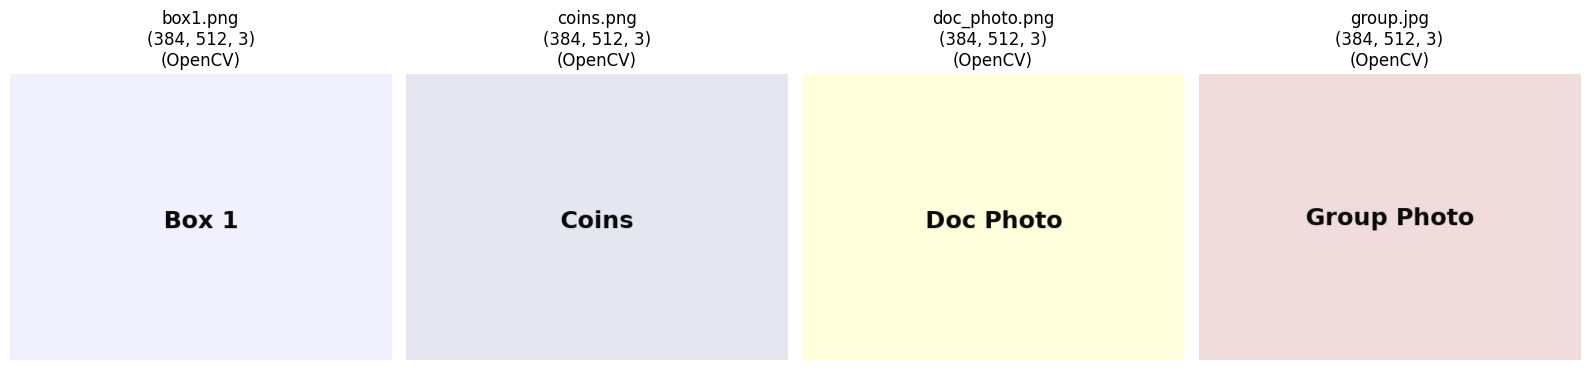


Batch Processing Summary:
Total images processed: 4
Total pixels: 786,432
Average dimensions: 384x512 pixels


In [12]:
# Example: Batch processing multiple images
print("=== Batch Processing Multiple Images ===")

# Get all PNG and JPG files
image_extensions = ['.png', '.jpg', '.jpeg']
batch_files = [
    f for f in os.listdir(sample_dir) 
    if any(f.lower().endswith(ext) for ext in image_extensions)
][:4]  # Limit to first 4 images

print(f"Processing {len(batch_files)} images: {batch_files}")

# Process each image
processed_images = []
image_info = []

for filename in batch_files:
    filepath = os.path.join(sample_dir, filename)
    
    # Try different libraries
    try:
        # Read with OpenCV
        img_cv = cv2.imread(filepath)
        if img_cv is not None:
            img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
            processed_images.append(img_cv)
            image_info.append({
                'filename': filename,
                'shape': img_cv.shape,
                'library': 'OpenCV'
            })
        else:
            # Try with PIL
            pil_img = Image.open(filepath)
            img_array = np.array(pil_img)
            processed_images.append(img_array)
            image_info.append({
                'filename': filename,
                'shape': img_array.shape,
                'library': 'PIL'
            })
            
    except Exception as e:
        print(f"Failed to process {filename}: {e}")
        continue

# Display results
if processed_images:
    n_cols = min(4, len(processed_images))
    n_rows = (len(processed_images) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, (img, info) in enumerate(zip(processed_images, image_info)):
        row, col = i // n_cols, i % n_cols
        ax = axes[row, col]
        ax.imshow(img)
        ax.set_title(f"{info['filename']}\n{info['shape']}\n({info['library']})")
        ax.axis('off')
    
    # Hide empty subplots
    for i in range(len(processed_images), n_rows * n_cols):
        row, col = i // n_cols, i % n_cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\nBatch Processing Summary:")
    total_pixels = sum(np.prod(info['shape'][:2]) for info in image_info)
    avg_height = np.mean([info['shape'][0] for info in image_info])
    avg_width = np.mean([info['shape'][1] for info in image_info])
    
    print(f"Total images processed: {len(processed_images)}")
    print(f"Total pixels: {total_pixels:,}")
    print(f"Average dimensions: {avg_height:.0f}x{avg_width:.0f} pixels")
else:
    print("No images were successfully processed")

## 10. Conclusion

Congratulations! You've learned the fundamentals of image I/O and visualization in Python.

### What We've Covered:

1. **Image Fundamentals**: Pixels, resolution, channels, and digital representation
2. **Image Formats**: JPEG, PNG, BMP, TIFF - when and why to use each
3. **Color Spaces**: RGB, BGR, HSV, Grayscale - how colors are represented
4. **Reading Images**: Using OpenCV, PIL, and imageio with error handling
5. **Writing Images**: Saving in different formats with quality control
6. **Visualization**: Displaying images with matplotlib, single and multiple images
7. **Practical Examples**: Complete pipelines and batch processing

### Key Takeaways:

- **OpenCV**: Best for computer vision tasks, reads in BGR format
- **PIL**: Great for basic operations, works in RGB
- **imageio**: Simplest interface for quick tasks
- **matplotlib**: Essential for visualization in Jupyter notebooks
- **Color Spaces**: Always convert BGR→RGB for display
- **Error Handling**: Always check if `cv2.imread()` returns `None`

### Next Steps:

Now that you understand the basics, you can explore:
- **Image Processing**: Filtering, enhancement, transformations
- **Computer Vision**: Object detection, feature extraction
- **Advanced Topics**: Deep learning for vision tasks

### Further Reading:
- [OpenCV Documentation](https://docs.opencv.org/)
- [Pillow Documentation](https://pillow.readthedocs.io/)
- [matplotlib Image Tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html)
- [scikit-image](https://scikit-image.org/) - Another powerful image processing library

Remember: Practice is key! Try loading your own images and experimenting with different operations.

**Happy coding! 🚀**